# Regression and Other Stories: Unemployment

Time series fit and posterior predictive model checking for unemployment series. See Chapter 11 in Regression and Other Stories.

----

### Load packages

In [19]:
using DataFrames, StatsPlots, CSV, HTTP
using Distributions, Turing, MCMCChains
using StatsBase

### Load data

In [2]:
data = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Unemployment/data/unemp.txt"
unemp = CSV.File(HTTP.get(data).body, delim=" ") |> DataFrame
first(unemp, 6)

,year,y
,Int64,Float64
1,1947,3.9
2,1948,3.8
3,1949,5.9
4,1950,5.3
5,1951,3.3
6,1952,3.0


### Plot the unemployment rate

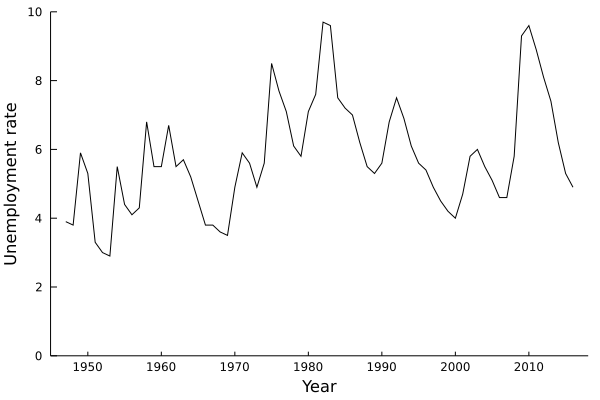

In [3]:
@df unemp plot(
    :year, :y,
    ylim=(0,10),
    xlabel="Year",
    ylabel="Unemployment rate",
    grid=false,
    color=:black,
    legend=false,
)

### Fit a 1st-order autoregression

In [4]:
@model function time_lag(y_lag, y)

    # Variance
    σ ~ truncated(Normal(0,10), 0, Inf)
    
    # Linear
    α ~ Normal(0, 2)
    β ~ Normal(0, 2)
    
    μ = α .+ β * y_lag 
    y ~ MvNormal(μ, σ)
end;

In [27]:
n = nrow(unemp)
unemp[!,"y_lag"] = vcat([missing], unemp.y[1:n-1]);
model_lag = time_lag(unemp.y_lag[2:end], unemp.y[2:end])
fit_lag = sample(model_lag, NUTS(), 4000)
summarystats(fit_lag)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Info: Found initial step size
│   ϵ = 0.003125
└ @ Turing.Inference C:\Users\tburch\.julia\packages\Turing\pwMQO\src\inference\hmc.jl:188
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01


Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           α    1.3023    0.4565     0.0072    0.0119   1419.0481    1.0005    ⋯
           β    0.7765    0.0760     0.0012    0.0020   1424.7916    1.0001    ⋯
           σ    1.0452    0.0915     0.0014    0.0020   1923.5480    1.0003    ⋯
                                                                1 column omitted


### Simulate replicated datasets using predict

In [34]:
time_lag_pred =  time_lag(unemp.y_lag, Vector{Missing}(missing, 70) )
predict(time_lag_pred, fit_lag)
#y_rep = sample(time_lag_pred, NUTS(), 4000)
#n_sims = length(y_rep);



LoadError: MethodError: no method matching MvNormal(::Vector{Union{Missing, Float64}}, ::Float64)
[0mClosest candidates are:
[0m  MvNormal([91m::Tracker.TrackedVector{var"#s50", A} where {var"#s50"<:Real, A}[39m, ::Real) at C:\Users\tburch\.julia\packages\DistributionsAD\y7bvb\src\tracker.jl:480
[0m  MvNormal([91m::AbstractVector{var"#s101"} where var"#s101"<:Real[39m, ::Real) at C:\Users\tburch\.julia\packages\Distributions\Xrm9e\src\multivariate\mvnormal.jl:220
[0m  MvNormal(::AbstractVector{T} where T, [91m::PDMats.AbstractPDMat[39m) at C:\Users\tburch\.julia\packages\Distributions\Xrm9e\src\multivariate\mvnormal.jl:205
[0m  ...

### Simulate replicated datasets "manually"

In [35]:
# TODO

n_sims = length(fit_lag)
y_rep = fill(NaN, (n_sims,n))

for s in 1:n_sims
    y_rep[s,1] = unemp.y[1]
    for t in 2:n
        y_rep[s,t] = 

4000

### Plot the simulated unemployment rate series

In [51]:
sty = Dict(
    :legend=>false,
    :grid=>false,
    :color=>:black
)

plots=[]
for s in sample(Array(1:1:n_sims),15, ordered=true)
    append!(plots,
        plot(
            unemp.year,
            y_rep
        )
    )
    
    println(s)

end

174
213
469
1058
1133
1138
1474
2137
2896
2927
2933
3125
3533
3578
3876


In [14]:
y_rep.value.data[150,1:69]

69-element Vector{Float64}:
    0.08213518891077078
  201.48337154958494
   -0.6196512418094642
    1.0
 -162.8355197476395
 -162.8355197476395
  848.1257454873688
   15.0
    0.06079684661715234
    0.0
    0.06079684661715234
    3.0
    0.10835462452765787
    ⋮
   -6.643181083421966
   -2.2506074853354745
   -5.592470282497338
    2.6789019985122637
    1.745665045527638
   -2.3994572167929684
    1.276750985920693
   -1.2083137419289431
   -2.078152351713341
    0.8594281687988394
   -3.6335698819298843
    1.1402300084707888

In [11]:
y_rep

Chains MCMC chain (4000×84×1 Array{Float64, 3}):

Start time        = 2021-06-08T13:46:05.640
Stop time         = 2021-06-08T13:46:49.651
Wall duration     = 44.01 seconds
Iterations        = 1:4000
Thinning interval = 1
Chains            = 1
Samples per chain = 4000
parameters        = y[1], y[2], y[3], y[4], y[5], y[6], y[7], y[8], y[9], y[10], y[11], y[12], y[13], y[14], y[15], y[16], y[17], y[18], y[19], y[20], y[21], y[22], y[23], y[24], y[25], y[26], y[27], y[28], y[29], y[30], y[31], y[32], y[33], y[34], y[35], y[36], y[37], y[38], y[39], y[40], y[41], y[42], y[43], y[44], y[45], y[46], y[47], y[48], y[49], y[50], y[51], y[52], y[53], y[54], y[55], y[56], y[57], y[58], y[59], y[60], y[61], y[62], y[63], y[64], y[65], y[66], y[67], y[68], y[69], α, β, σ
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  para